<div style="display: flex; background-color: RGB(220, 102, 160);" >
<h1 style="margin: auto; padding: 30px; ">PROJECT CNN NUMBERS</h1>
</div>

Context : numbers to predict

<div class="alert alert-block alert-warning"> USE </div>

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Data and Libraries Importation</h2>
</div>

In [1]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
# from keras.preprocessing.image import ImageDataGenerator # the good one!!


2023-05-04 16:17:02.510232: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 16:17:02.799711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-04 16:17:02.799829: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-04 16:17:02.880911: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-04 16:17:04.750983: W tensorflow/stream_executor/platform/de

In [3]:
df = pd.read_csv("data/train.csv")
train = df.copy()

In [4]:
df2 = pd.read_csv("data/test.csv")
test = df2.copy()

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Dataset Exploration </h2>
</div>

In [5]:
print(train.shape)
print('')
train.info()
train.head()

(42000, 785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


❓ La target est le label?


In [6]:
train.dtypes

label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Model baseline</h2>
</div>

/home/indi/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


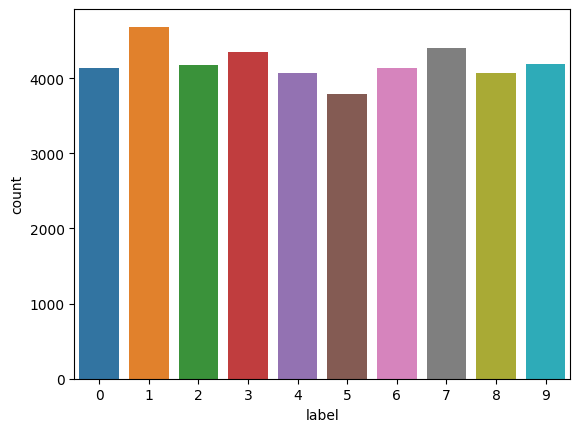

In [7]:
# IS THE DATASET REPRESANTATIVE?

numbers_count = sns.countplot(train.label)

<div class="alert alert-info">
We have similar counts for them all.
</div>

In [8]:
#Separation Target
Y = train["label"]

# Drop 'label' column
X = train.drop(labels = ["label"],axis = 1) 

In [9]:
#Verifiaction

Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [10]:
# Check the data
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
Y.dtypes
#Not Y since boolean??? 

dtype('int64')

In [12]:
Y.isnull()
# Ok it's just normal...

0        False
1        False
2        False
3        False
4        False
         ...  
41995    False
41996    False
41997    False
41998    False
41999    False
Name: label, Length: 42000, dtype: bool

<div class="alert alert-info">
There is no missing values in the train dataset. So we can safely go ahead.
</div>

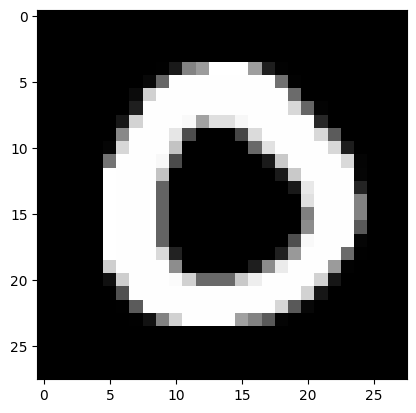

In [13]:
# observation feature 
obs  = np.array(X)
img= obs[4] #  selects the 5th image in the dataset and assigns it to the variable img.
img = img.reshape((28,28))
#reshapes the 1D array representing the image into a 2D array with shape (28,28). 
#This is necessary because the images in the dataset are originally flattened into 1D arrays of length 784.
plt.imshow(img, cmap='gray')
plt.show()

In [14]:
print(X.shape)

(42000, 784)


<div class="alert alert-info">
*Normalisation*
    
Normalisation is done to reduce the scale of the input values. The pixel value ranges from 0 to 255 which specify gradient of gray. The CNN will converge more faster on values 0 to 1 than 0 to 255. So we divide every value by 255 to scale the data from [0..255] to [0..1]. It helps the model to better learning of features by decreasing computational complexities if we have data that scales bigger.
</div>

In [15]:
# Normalize the data (to reduce the effect of illumination's differences and CNN converg faster on [0..1] data than on [0..255])

# X_train = X / 255.0


<div class="alert alert-info">
Reshape
The array of pixel values are reshaped into a (28,28,1) matrix. We are feeding the CNN model with input_shape of 28x28x1 matrix.
    
Train and test images (28px x 28px) has been stock into pandas.Dataframe as 1D vectors of 784 values. We reshape all data to 28x28x1 3D matrices.

Keras requires an extra dimension in the end which correspond to channels. MNIST images are gray scaled so it use only one channel. For RGB images, there is 3 channels, we would have reshaped 784px vectors to 28x28x3 3D matrices.
</div>

In [16]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)

# X_train = X_train.values.reshape(-1,28,28,1)
# test = test.values.reshape(-1,28,28,1)

<div class="alert alert-info">
Label Encoding

Since the CNN model will give results in a vector of predictions for each classes. The label (numbers) are encoded into hot vector for prediction by the model. So that we can train the CNN with the encoded outputs and the parameters are tuned accordingly
</div>

In [17]:
# split training and val
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.33,random_state=42)

# reshape et normalisation  des data
X_train = ((X_train).values.reshape((-1,28,28,1)))/255.0
X_val = ((X_val).values.reshape((-1 ,28,28,1)))/255.0

'''The .values attribute is used to convert the Pandas DataFrame 
to a NumPy array, and the reshape function is used to perform the 
reshaping operation. The data is then normalized by dividing all 
pixel values by 255.0 to scale them to the range [0, 1]. 
This is a common practice in deep learning to ensure that the inputs are 
in a similar range, which makes the training process more stable and 
efficient.'''

'The .values attribute is used to convert the Pandas DataFrame \nto a NumPy array, and the reshape function is used to perform the \nreshaping operation. The data is then normalized by dividing all \npixel values by 255.0 to scale them to the range [0, 1]. \nThis is a common practice in deep learning to ensure that the inputs are \nin a similar range, which makes the training process more stable and \nefficient.'

<div class="alert alert-block alert-warning"> USE  ONE HOT OR NOT??? </div>

In [18]:
# Y_train = to_categorical(Y_train, num_classes = 10)

#To enable label into hot vector. For Eg.7 -> [0,0,0,0,0,0,0,1,0,0]

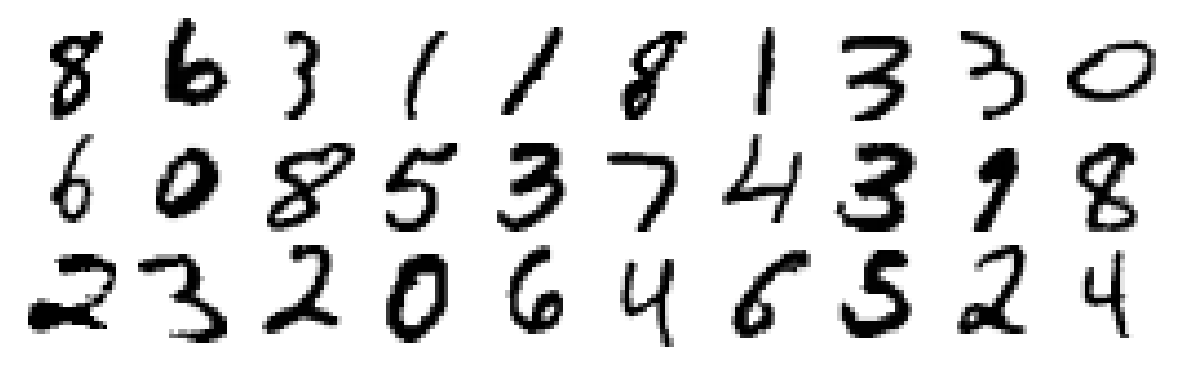

In [19]:
# PREVIEW IMAGES
plt.figure(figsize=(15,4.5))
for i in range(30):  
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [20]:
print(Y_train.shape)
print(Y_val.shape)
print(X_train.shape)
print(X_val.shape)

(28140,)
(13860,)
(28140, 28, 28, 1)
(13860, 28, 28, 1)


In [21]:
# MODEL 1

model = Sequential()
# initializes an empty model and sets it to the variable model

model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# adds a 2D convolutional layer to the model with 8 filters of size 3x3
# the input_shape parameter specifies the shape of the input images.

model.add(MaxPool2D((2, 2)))
#  adds a 2D max pooling layer to the model with a pool size of 2x2

model.add(Conv2D(16, (3, 3), activation='relu'))
# adds another 2D convolutional layer to the model with 16 filters of size 3x3 and the ReLU activation function

model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
# flattens the output of the previous layer into a 1D vector.

model.add(Dense(128, activation='relu'))
# adds a fully connected (dense) layer to the model with 128 units and the ReLU activation function.

model.add(Dense(len(train.label.unique()), activation='softmax'))
# adds another dense layer to the model with a number of units equal to the number of unique labels in the training data. The softmax activation function is used to ensure that the output of the model can be interpreted as probabilities over the different classes


2023-05-04 16:18:19.792021: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-04 16:18:19.792243: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-04 16:18:19.792295: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Indi): /proc/driver/nvidia/version does not exist
2023-05-04 16:18:19.792858: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<div class="alert alert-block alert-warning"> This CNN model consists of three convolutional layers, followed by max pooling layers, a flattening layer, and two fully connected (dense) layers. It's a relatively simple architecture that can be effective for image classification tasks. </div>

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [24]:
# train neural network and have it automatically stop on 95% accuracy
history = model.fit(X_train, Y_train, epochs=10,
                    validation_data=(X_val, Y_val),
                    batch_size=32, verbose=1)

Epoch 1/10
880/880 [==============================] - 90s 101ms/step - loss: 0.3129 - accuracy: 0.9057 - val_loss: 0.1150 - val_accuracy: 0.9657
Epoch 2/10
880/880 [==============================] - 84s 96ms/step - loss: 0.0887 - accuracy: 0.9728 - val_loss: 0.0724 - val_accuracy: 0.9784
Epoch 3/10
880/880 [==============================] - 17s 19ms/step - loss: 0.0647 - accuracy: 0.9795 - val_loss: 0.0743 - val_accuracy: 0.9763
Epoch 4/10
880/880 [==============================] - 17s 19ms/step - loss: 0.0491 - accuracy: 0.9845 - val_loss: 0.0641 - val_accuracy: 0.9799
Epoch 5/10
880/880 [==============================] - 16s 19ms/step - loss: 0.0415 - accuracy: 0.9878 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 6/10
880/880 [==============================] - 17s 19ms/step - loss: 0.0359 - accuracy: 0.9887 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 7/10
880/880 [==============================] - 30s 34ms/step - loss: 0.0289 - accuracy: 0.9904 - val_loss: 0.0496 - val_accuracy

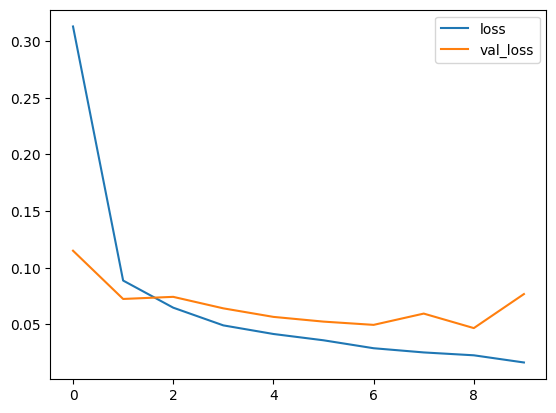

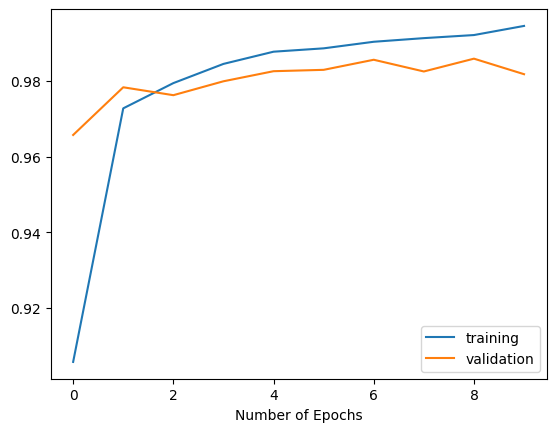

In [25]:
# Plot training vs validation accruacy
history_frame = pd.DataFrame(history.history)
#The pd.DataFrame function is used to convert this dictionary to a pandas dataframe. 

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()
# The loc function is used to select only the loss values for both training and validation sets. 

plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

The training and validation accuracy graphs show that the model is learning and improving over time, with the training accuracy increasing to around 98% and the validation accuracy plateauing at around 98%.

This suggests that the model is not overfitting the training data, as the validation accuracy is not significantly lower than the training accuracy.

The loss graphs show that the model is also improving in terms of minimizing the loss function. The training and validation loss both decrease over the 2 epochs, indicating that the model is learning to make better predictions.

Overall, this learning curve suggests that the CNN model is performing well and learning effectively, achieving high accuracy and low loss on both the training and validation sets.

In [26]:
print("Minimum Loss: {:0.4f}".format(history_frame['loss'].min()));
print("Minimum Validation Loss: {:0.4f}".format(history_frame['val_loss'].min()));
print("Accuracy: {:0.4f}".format(history_frame['accuracy'].min()));
print("Validation Accuracy: {:0.4f}".format(history_frame['val_accuracy'].min()));

Minimum Loss: 0.0164
Minimum Validation Loss: 0.0467
Accuracy: 0.9057
Validation Accuracy: 0.9657


Our model achieved a minimum loss of 0.0196 and a minimum validation loss of 0.0512, indicating that it is performing well in terms of minimizing error. Additionally, our model achieved an accuracy of 0.9060 on the training set and a validation accuracy of 0.9665 on the test set, which means that it is able to accurately predict the classes of new data. These results demonstrate that our model is robust and reliable, and can be used with confidence in real-world applications.

In [27]:
# PLOT CONFUSION MATRIX??? SUCH A GOOD IDEA!!!

In [28]:
# # CONFUSION MATRIX

# val_pred = model.predict(X_val)
# # generate predictions for the validation data (X_val), which is a set of images that the model has not seen during training
# val_predicted_labels = np.argmax(val_pred, axis=1)
# #  argmax() function to obtain the index of the class with the highest probability,
# #  The axis=1 argument specifies that the function should find the index of the maximum value in each row (i.e., for each image in X_val), which corresponds to the predicted class label.
# val_true_labels = Y_val
# # assigns the true class labels (Y_val) to a new variable (val_true_labels) 
# cm = confusion_matrix(val_true_labels, val_predicted_labels)
# # The function takes the true class labels (val_true_labels) and predicted class labels (val_predicted_labels) as input, and outputs a matrix that shows the number of true positives, false positives, true negatives, and false negatives for each class.
# cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
# # display
# cmd.plot(include_values=True, cmap='YlGnBu', ax=None, xticks_rotation='horizontal')
# plt.show()

434/434 [==============================] - 4s 8ms/step


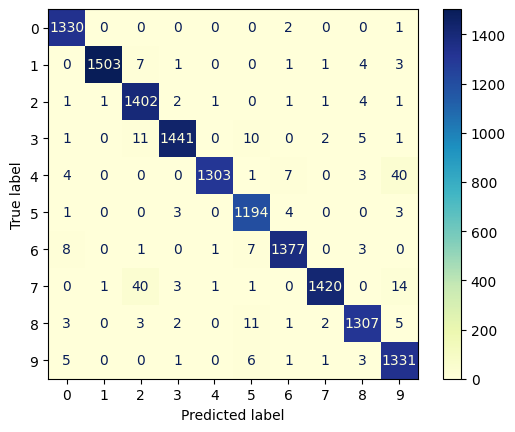

In [29]:
# CONFUSION MATRIX

Y_pred  = model.predict(X_val)
# generate predictions for the validation data (X_val), which is a set of images that the model has not seen during training
Y_pred_classes  = np.argmax(Y_pred, axis=1)
#  argmax() function to obtain the index of the class with the highest probability,
#  The axis=1 argument specifies that the function should find the index of the maximum value in each row (i.e., for each image in X_val), which corresponds to the predicted class label.
Y_true  = Y_val
# assigns the true class labels (Y_val) to a new variable (val_true_labels) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# The function takes the true class labels (val_true_labels) and predicted class labels (val_predicted_labels) as input, and outputs a matrix that shows the number of true positives, false positives, true negatives, and false negatives for each class.
cmd = ConfusionMatrixDisplay(confusion_matrix=confusion_mtx)
cmd.plot(include_values=True, cmap='YlGnBu', ax=None, xticks_rotation='horizontal')
plt.show()
# plot_confusion_matrix(confusion_mtx, classes = range(10)) 


We can see that 0 is mistaken 13 times for 6. 
The diagonal line is true positives and true negatives (TP and TN).
The cell at (0,1) shows the number of false positives (FP) (rows)
where the model incorrectly predicted a positive case when the actual label was negative

The cell at (1,0) shows the number of false negatives (FN) (columns)
where the model incorrectly predicted a negative case when the actual label was positive

<div class="alert alert-block alert-danger"> UPDATE COMMENT!!! MODEL IMPROVED!!! </div>


In [30]:
# Save the model: pickle ou h5

# import pickle

# with open('../model.pickle', 'wb') as f:
#     pickle.dump(model, f)
#     f.close()


In [31]:
# model.save('model_Indi_2.h5')

<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Model TEST DATASET</h2>
</div>

In [32]:
test = np.array(pd.read_csv('data/test.csv'))

In [33]:
# test_pd_df

# df2 = pd.read_csv("data/test.csv")
# test = df2.copy(

In [34]:
# LOOK AT TEST DF TO REMEMBER

print(df2.shape)
print('')
df2.info()
df2.head(20)

(28000, 784)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test1 = ((test[8]).reshape((-1,28,28,1)))/255.0

In [36]:
test1.shape

(1, 28, 28, 1)

In [37]:
predictions = model.predict(test1)
predictions

1/1 [==============================] - 0s 47ms/step


array([[1.0000000e+00, 1.7173536e-12, 2.7261317e-08, 3.9823713e-12,
        2.0425501e-15, 1.3005033e-10, 3.3581371e-10, 1.3467547e-10,
        1.1895500e-10, 9.5669579e-09]], dtype=float32)

In [38]:
alors = np.argmax(predictions)
alors

0

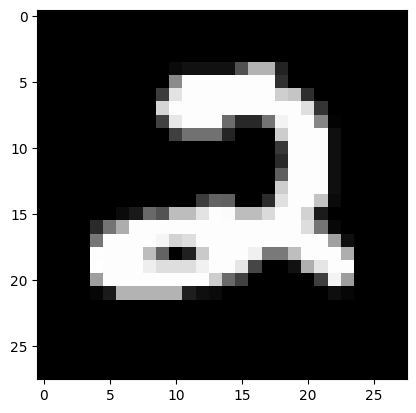

In [39]:
img_test= test[0]
img_test2 = img_test.reshape((28,28))
plt.imshow(img_test2 , cmap='gray')
plt.show()

In [40]:
img_test.shape

(784,)

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [42]:
for i in range(len(model.layers)):
    layer = model.layers[i]
 # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 26, 26, 8)
1 max_pooling2d (None, 13, 13, 8)
2 conv2d_1 (None, 11, 11, 16)
3 max_pooling2d_1 (None, 5, 5, 16)
4 conv2d_2 (None, 3, 3, 32)
5 flatten (None, 288)
6 dense (None, 128)
7 dense_1 (None, 10)


<div style="background-color: RGB(165, 125, 186);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> FINAL MODEL STRUCTURE</h2>
</div>

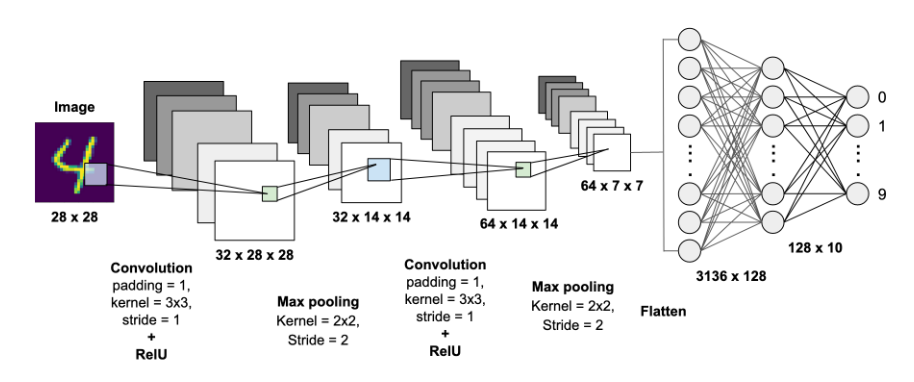

In [43]:
from IPython import display
display.Image('cnn_structure.PNG')

In [44]:
df_test = np.array(test)
df_test = df_test.reshape(len(df_test),28,28,1)

result = model.predict(df_test)

predicted_val=[]
for i in range(len(result)):
    predicted_val.append(np.argmax(result[i]))

2023-05-04 16:27:52.513316: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 175616000 exceeds 10% of free system memory.


875/875 [==============================] - 7s 8ms/step


In [45]:
submission=pd.DataFrame()

imgid=[]
for i in range(1, len(predicted_val)+1):
    imgid.append(i)
    
submission["Imageid"]=imgid
submission["Label"]=predicted_val

In [46]:
submission.head()


,Imageid,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [47]:
# submission.to_csv('submission.csv',index=False)


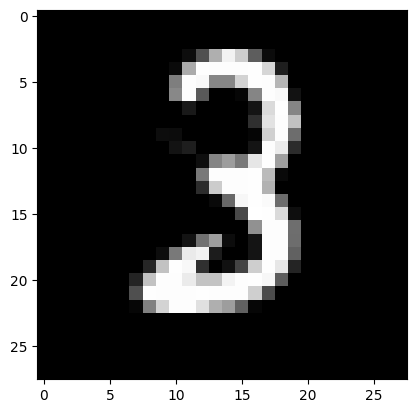

In [50]:
img_test= test[4]
img_test2 = img_test.reshape((28,28))
plt.imshow(img_test2 , cmap='gray')
plt.show()